In [12]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ---------- ----------------------------- 0.8/2.9 MB 609.8 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   ------------------ --------------------- 1.3/2.9 MB 682.9 kB/s eta 0:00:03
   --------------------- ------------------ 1.6/2.9 MB 718.1 kB/s eta 0:00:02
   --------------------- ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.0 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.0 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=9d836366d1338d31e178efbeebbf9d466e74742555bc1714bcc04c3d10452f6d
  Stored in directory: c:\users\abhisek\appdata\local\pip\cache\wheels\44\af\da\5ffc433e2786f0b1a9c6f458d5fb8f611d8eb332387f18698f
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [1]:
# Core imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf

# Hugging Face (for raw EDA)
from datasets import load_dataset
from transformers import AutoTokenizer

# Local project imports
sys.path.append("src")

from utils import load_config, prepare_dataset, make_tf_dataset
from model import build_multimodal_model

In [2]:
cfg = load_config("config.yaml")
cfg

{'dataset': {'hf_name': 'daniel3303/StoryReasoning',
  'seq_len': 3,
  'batch_size': 16,
  'image_size': 128,
  'max_caption_len': 32,
  'max_reason_len': 32},
 'model': {'image_feat_dim': 512,
  'text_embed_dim': 300,
  'text_hidden_dim': 512,
  'multimodal_dim': 512,
  'temporal_hidden_dim': 512,
  'text_decoder_hidden': 512,
  'vocab_size': 30522,
  'pad_token_id': 0,
  'bos_token_id': 101,
  'eos_token_id': 102,
  'reason_embed_dim': 256,
  'reason_hidden_dim': 512},
 'training': {'lr': '1e-4',
  'epochs': 5,
  'device': 'auto',
  'grad_clip': 1.0,
  'log_interval': 50,
  'save_dir': 'results/checkpoints'}}

In [3]:
raw_ds = load_dataset(cfg['dataset']['hf_name'])
raw_ds

# Peek at the first example in the training split
first_example = raw_ds['train'][0]
first_example

# Show keys and types for better understanding
for k, v in first_example.items():
    print(k, type(v))


story_id <class 'str'>
images <class 'list'>
frame_count <class 'int'>
chain_of_thought <class 'str'>
story <class 'str'>


C:\Users\Abhisek\AppData\Local\Temp\ipykernel_1884\2305993636.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


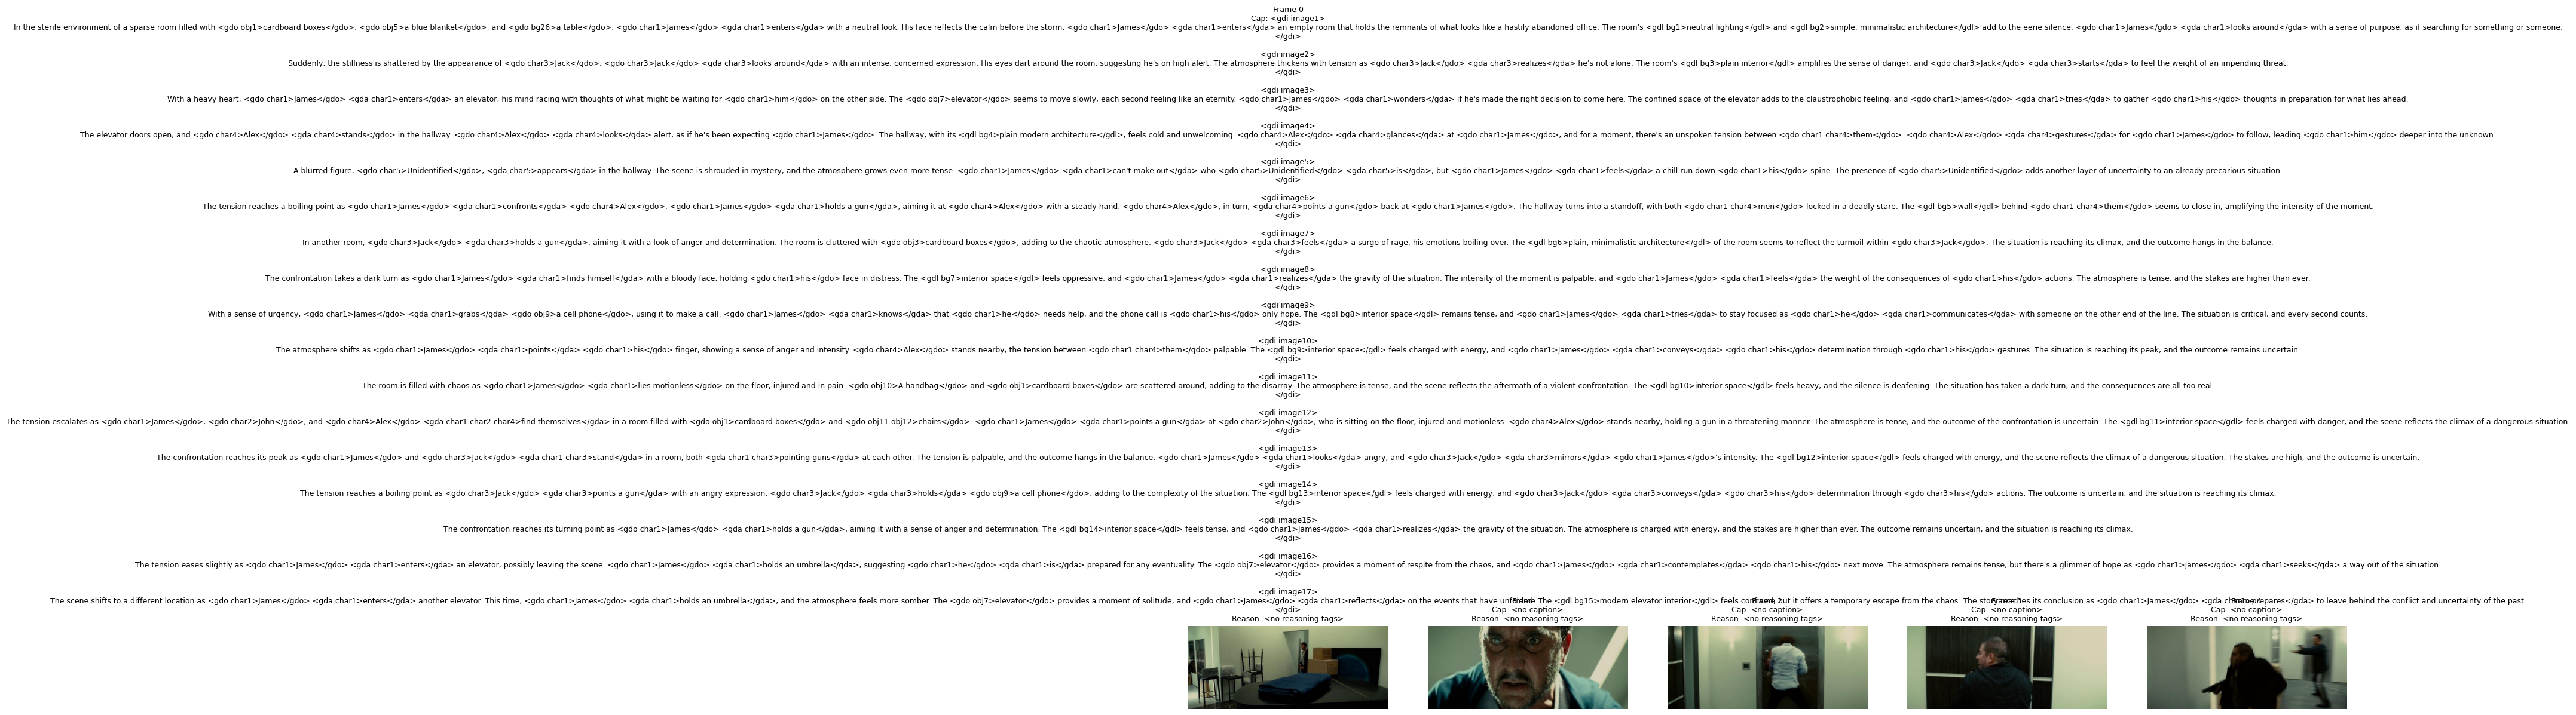

In [7]:
from PIL import Image
import numpy as np

def show_story_example(example, max_frames=3):
    frames = None
    captions = None
    reasons = None
    
    # Try several keys (aligned with utils.py)
    for k in ["frames", "images", "frames_paths", "image_paths", "imgs"]:
        if k in example:
            frames = example[k]
            break
            
    for k in ["captions", "descriptions", "texts", "story"]:
        if k in example:
            captions = example[k]
            break
            
    for k in ["reasoning_tags", "reasoning", "logic_tags", "tags", "reason_labels", "annotations"]:
        if k in example:
            reasons = example[k]
            break

    if frames is None:
        print("No frames detected in this example.")
        return
    
    if not isinstance(captions, (list, tuple)):
        captions = [captions] if captions is not None else []
    if reasons is not None and not isinstance(reasons, (list, tuple)):
        reasons = [reasons]

    n = min(len(frames), max_frames)
    plt.figure(figsize=(5 * n, 4))
    
    for i in range(n):
        plt.subplot(1, n, i+1)
        f = frames[i]

        # --- Robust image handling ---
        if isinstance(f, str):
            # file path
            im = Image.open(f).convert("RGB")
        elif isinstance(f, Image.Image):
            # already a PIL image (e.g., JpegImageFile)
            im = f.convert("RGB")
        else:
            # assume array-like
            im = Image.fromarray(np.array(f)).convert("RGB")

        plt.imshow(im)
        plt.axis("off")

        cap = captions[i] if captions and i < len(captions) else "<no caption>"
        reason = reasons[i] if reasons and i < len(reasons) else "<no reasoning tags>"
        plt.title(f"Frame {i}\nCap: {cap}\nReason: {reason}", fontsize=9)

    plt.tight_layout()
    plt.show()

show_story_example(first_example, max_frames=5)



In [8]:
# Processed train set
train_processed, tokenizer = prepare_dataset(cfg, split="train", keep_small=False)
len(train_processed)

# Try to load a test split; if it doesn't exist, create a small holdout from train
try:
    test_processed, _ = prepare_dataset(cfg, split="test", keep_small=False)
except Exception as e:
    print("No explicit 'test' split found, creating a holdout from train. Error:", e)
    from sklearn.model_selection import train_test_split
    train_list, test_list = train_test_split(train_processed, test_size=0.15, random_state=42)
    train_processed = train_list
    test_processed = test_list

len(train_processed), len(test_processed)


(3552, 626)

In [9]:
train_ds = make_tf_dataset(train_processed, cfg, shuffle=True)
test_ds  = make_tf_dataset(test_processed,  cfg, shuffle=False)


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [10]:
batch = next(iter(train_ds))
images_batch, input_ids_batch, reason_ids_batch = batch

print("images_batch shape:", images_batch.shape)   # (B, S, H, W, C)
print("input_ids_batch shape:", input_ids_batch.shape)  # (B, S, T_cap)
print("reason_ids_batch shape:", reason_ids_batch.shape)  # (B, S, T_reason)


images_batch shape: (16, 3, 128, 128, 3)
input_ids_batch shape: (16, 3, 32)
reason_ids_batch shape: (16, 3, 32)


In [11]:
models = build_multimodal_model(cfg)
full_model = models['full_model']
visual_enc = models['visual_enc']

full_model.summary()


Model: "multimodal_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images_seq          │ (None, 3, 128,    │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ captions_seq        │ (None, 3, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reasons_seq         │ (None, 3, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_visual           │ (None, 3, 512)    │    707,200 │ images_seq[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_text             │ (None, 3, 512)    │ 10,821,624 │ captions_seq[0][… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_reason           │ (None, 3, 512)    │  9,388,544 │ reasons_seq[0][0] │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuse_vis_text_reas… │ (None, 3, 1536)   │          0 │ td_visual[0][0],  │
│ (Concatenate)       │                   │            │ td_text[0][0],    │
│                     │                   │            │ td_reason[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_proj             │ (None, 3, 512)    │    786,944 │ fuse_vis_text_re… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_lstm       │ [(None, 3, 512),  │  2,099,200 │ td_proj[0][0]     │
│ (LSTM)              │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 512)       │          0 │ temporal_lstm[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_embed           │ (None, 32, 300)   │  9,156,600 │ dec_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_ctx_repeat      │ (None, 32, 512)   │          0 │ get_item[0][0]    │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_concat          │ (None, 32, 812)   │          0 │ dec_embed[0][0],  │
│ (Concatenate)       │                   │            │ dec_ctx_repeat[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ (None, 32, 512)   │  2,713,600 │ dec_concat[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_pred_hidden     │ (None, 512)       │    262,656 │ get_item[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_logits          │ (None, 32, 30522) │ 15,657,786 │ dec_lstm[0][0]  

 Total params: 51,856,810 (197.82 MB)

 Trainable params: 51,855,466 (197.81 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [12]:
def collate_for_training(batch_images, batch_input_ids, bos_id=101):
    """
    Prepare dec_input and dec_target for teacher-forcing training.

    Args:
      batch_images   : (B, seq_len, H, W, C)
      batch_input_ids: (B, seq_len, T_cap)

    Returns:
      images      : (B, seq_len, H, W, C)
      captions_seq: (B, seq_len, T_cap)
      dec_input   : (B, T_cap)
      dec_target  : (B, T_cap)
    """
    target = batch_input_ids[:, -1, :]   # last caption in the sequence (B, T)
    dec_input = np.concatenate(
        [np.full((target.shape[0], 1), bos_id, dtype=np.int32), target[:, :-1]],
        axis=1
    )  # (B, T)
    return batch_images, batch_input_ids, dec_input, target


In [13]:
lr = float(cfg['training'].get('lr', 1e-4))
epochs = int(cfg['training'].get('epochs', 5))
grad_clip = float(cfg['training'].get('grad_clip', 1.0))
pad_id = int(cfg['model'].get('pad_token_id', 0))
bos_id = int(cfg['model'].get('bos_token_id', 101))

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

train_loss_hist = []
train_text_loss_hist = []
train_img_loss_hist = []


In [14]:
@tf.function
def train_step(images, captions_seq, reasons_seq, dec_input, dec_target):
    with tf.GradientTape() as tape:
        logits, img_pred = full_model(
            [images, captions_seq, reasons_seq, dec_input],
            training=True
        )

        # TEXT LOSS
        per_token_loss = tf.keras.losses.sparse_categorical_crossentropy(
            dec_target, logits, from_logits=True
        )  # (B, T)
        mask = tf.cast(tf.not_equal(dec_target, pad_id), tf.float32)
        per_token_loss = per_token_loss * mask
        loss_text = tf.reduce_sum(per_token_loss) / (tf.reduce_sum(mask) + 1e-8)

        # IMAGE LOSS (align img_pred to visual encoder space)
        last_images = images[:, -1, :, :, :]  # (B, H, W, C)
        target_img_feat = tf.stop_gradient(visual_enc(last_images, training=False))
        loss_img = tf.reduce_mean(tf.square(target_img_feat - img_pred))

        loss = loss_text + 0.5 * loss_img

    grads = tape.gradient(loss, full_model.trainable_variables)
    grads, _ = tf.clip_by_global_norm(grads, grad_clip)
    optimizer.apply_gradients(zip(grads, full_model.trainable_variables))

    return loss, loss_text, loss_img


In [16]:
from math import ceil
from tqdm.notebook import tqdm

# Compute total steps per epoch
steps_per_epoch = ceil(len(train_processed) / cfg['dataset']['batch_size'])

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")
    epoch_loss = []
    epoch_text_loss = []
    epoch_img_loss = []

    # tqdm now shows: 172/172 instead of 172/?
    for batch in tqdm(train_ds, total=steps_per_epoch, desc=f"Epoch {epoch}"):
        
        images_batch, input_ids_batch, reason_ids_batch = batch

        images_np = images_batch.numpy()
        input_ids_np = input_ids_batch.numpy()
        reasons_np = reason_ids_batch.numpy()

        imgs, caps_seq, dec_input, dec_target = collate_for_training(
            images_np, input_ids_np, bos_id=bos_id
        )

        # Convert back to tensors for train_step
        images = tf.convert_to_tensor(imgs, dtype=tf.float32)
        captions_seq = tf.convert_to_tensor(caps_seq, dtype=tf.int32)
        reasons_seq = tf.convert_to_tensor(reasons_np, dtype=tf.int32)
        dec_input_tf = tf.convert_to_tensor(dec_input, dtype=tf.int32)
        dec_target_tf = tf.convert_to_tensor(dec_target, dtype=tf.int32)

        loss, loss_text, loss_img = train_step(
            images, captions_seq, reasons_seq, dec_input_tf, dec_target_tf
        )

        epoch_loss.append(loss.numpy())
        epoch_text_loss.append(loss_text.numpy())
        epoch_img_loss.append(loss_img.numpy())

    mean_loss = float(np.mean(epoch_loss))
    mean_text = float(np.mean(epoch_text_loss))
    mean_img = float(np.mean(epoch_img_loss))

    train_loss_hist.append(mean_loss)
    train_text_loss_hist.append(mean_text)
    train_img_loss_hist.append(mean_img)

    print(f"Epoch {epoch} - loss: {mean_loss:.4f}  text: {mean_text:.4f}  img: {mean_img:.4f}")



Epoch 1/5


Epoch 1:   0%|          | 0/222 [00:00<?, ?it/s]

Epoch 1 - loss: 0.1155  text: 0.0000  img: 0.2310

Epoch 2/5


Epoch 2:   0%|          | 0/222 [00:00<?, ?it/s]

Epoch 2 - loss: 0.0384  text: 0.0000  img: 0.0769

Epoch 3/5


Epoch 3:   0%|          | 0/222 [00:00<?, ?it/s]

Epoch 3 - loss: 0.0653  text: 0.0000  img: 0.1305

Epoch 4/5


Epoch 4:   0%|          | 0/222 [00:00<?, ?it/s]

Epoch 4 - loss: 0.1317  text: 0.0000  img: 0.2634

Epoch 5/5


Epoch 5:   0%|          | 0/222 [00:00<?, ?it/s]

Epoch 5 - loss: 0.2979  text: 0.0000  img: 0.5958


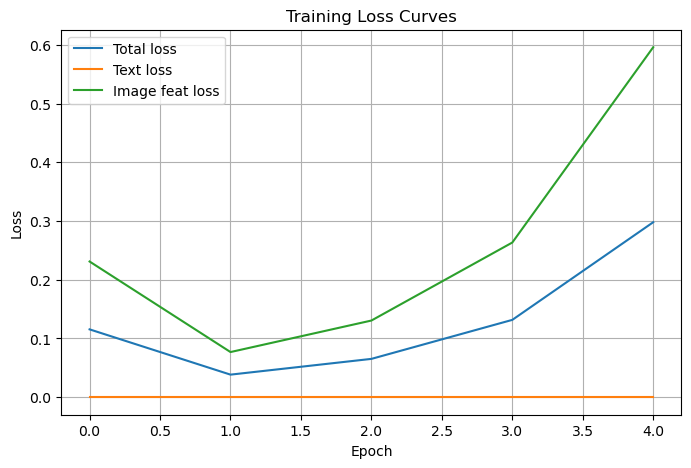

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss_hist, label="Total loss")
plt.plot(train_text_loss_hist, label="Text loss")
plt.plot(train_img_loss_hist, label="Image feat loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
def evaluate_on_dataset(dataset):
    all_loss = []
    all_text_loss = []
    all_img_loss = []

    for batch in dataset:
        images_batch, input_ids_batch, reason_ids_batch = batch
        images_np = images_batch.numpy()
        input_ids_np = input_ids_batch.numpy()
        reasons_np = reason_ids_batch.numpy()

        imgs, caps_seq, dec_input, dec_target = collate_for_training(
            images_np, input_ids_np, bos_id=bos_id
        )

        images = tf.convert_to_tensor(imgs, dtype=tf.float32)
        captions_seq = tf.convert_to_tensor(caps_seq, dtype=tf.int32)
        reasons_seq = tf.convert_to_tensor(reasons_np, dtype=tf.int32)
        dec_input_tf = tf.convert_to_tensor(dec_input, dtype=tf.int32)
        dec_target_tf = tf.convert_to_tensor(dec_target, dtype=tf.int32)

        # No gradient
        logits, img_pred = full_model(
            [images, captions_seq, reasons_seq, dec_input_tf],
            training=False
        )

        per_token_loss = tf.keras.losses.sparse_categorical_crossentropy(
            dec_target_tf, logits, from_logits=True
        )
        mask = tf.cast(tf.not_equal(dec_target_tf, pad_id), tf.float32)
        per_token_loss = per_token_loss * mask
        loss_text = tf.reduce_sum(per_token_loss) / (tf.reduce_sum(mask) + 1e-8)

        last_images = images[:, -1, :, :, :]
        target_img_feat = visual_enc(last_images, training=False)
        loss_img = tf.reduce_mean(tf.square(target_img_feat - img_pred))

        loss = loss_text + 0.5 * loss_img

        all_loss.append(loss.numpy())
        all_text_loss.append(loss_text.numpy())
        all_img_loss.append(loss_img.numpy())

    return {
        "loss": float(np.mean(all_loss)),
        "text_loss": float(np.mean(all_text_loss)),
        "img_loss": float(np.mean(all_img_loss)),
    }

test_metrics = evaluate_on_dataset(test_ds)
test_metrics


{'loss': 0.02434074506163597,
 'text_loss': 0.0,
 'img_loss': 0.04868149012327194}

In [20]:
def predict_last_caption(images, captions_seq, reasons_seq, tokenizer, max_len):
    """
    Teacher-forced decoding for analysis:
      - Build dec_input from ground-truth last caption.
      - Run model once and take argmax over vocab.
    """
    # captions_seq: (S, T_cap)
    last_caption = captions_seq[-1:]  # (1, T_cap)

    # Build dec_input as in training
    target = last_caption[0]  # (T_cap,)
    dec_input = np.concatenate(
        [np.array([bos_id], dtype=np.int32), target[:-1]],
        axis=0
    )[None, :]  # (1, T_cap)

    images_b = images[None, ...]        # (1, S, H, W, C)
    captions_b = captions_seq[None, ...]  # (1, S, T_cap)
    reasons_b = reasons_seq[None, ...]    # (1, S, T_reason)

    logits, _ = full_model(
        [images_b, captions_b, reasons_b, dec_input],
        training=False
    )
    # logits: (1, T_cap, vocab)
    pred_ids = tf.argmax(logits, axis=-1).numpy()[0]  # (T_cap,)

    # Decode ground truth and prediction (truncate at EOS if present)
    gt_ids = target

    def decode_ids(ids):
        # stop at EOS if present
        eos = cfg['model'].get('eos_token_id', None)
        if eos is not None and eos in ids:
            idx = np.where(ids == eos)[0][0]
            ids = ids[:idx]
        return tokenizer.decode(ids, skip_special_tokens=True)

    gt_text = decode_ids(gt_ids)
    pred_text = decode_ids(pred_ids)

    return gt_text, pred_text


In [21]:
# Take one batch from test_ds
test_batch = next(iter(test_ds))
images_batch, input_ids_batch, reason_ids_batch = test_batch

# Use first element in batch
images_1 = images_batch[0].numpy()       # (S, H, W, C)
caps_1 = input_ids_batch[0].numpy()      # (S, T_cap)
reasons_1 = reason_ids_batch[0].numpy()  # (S, T_reason)

gt_caption, pred_caption = predict_last_caption(
    images_1, caps_1, reasons_1, tokenizer, cfg['dataset']['max_caption_len']
)

print("Ground truth last caption:")
print(gt_caption)
print("\nPredicted last caption:")
print(pred_caption)


Ground truth last caption:


Predicted last caption:
##evaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaeva


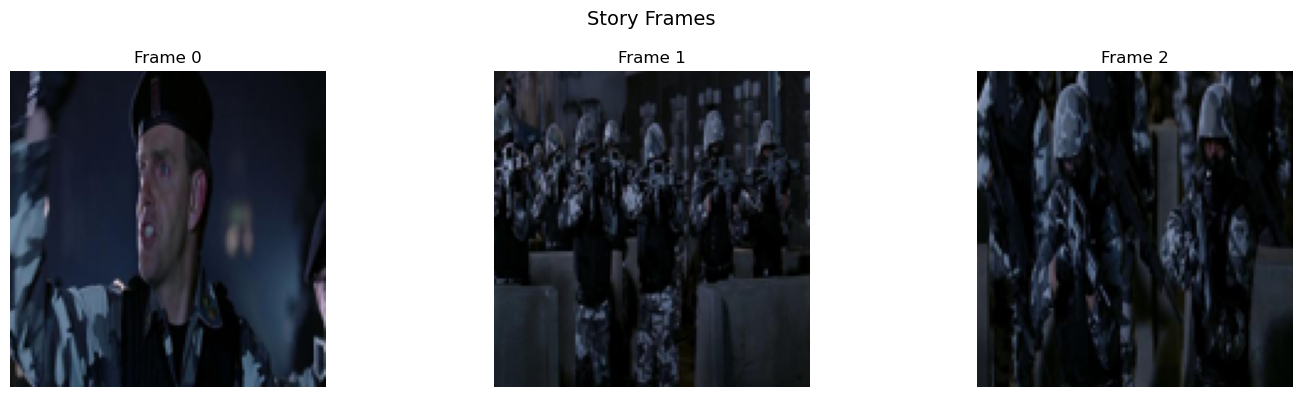

Ground truth last caption:
 

Predicted last caption:
 ##evaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaevaeva


In [22]:
# Frames are already resized/normalized to [-1,1] from utils.prepare_dataset
# so we need to unnormalize for display.

def unnormalize_image(arr):
    # arr in [-1, 1] -> [0, 1]
    return (arr / 2.0 + 0.5).clip(0, 1)

S = cfg['dataset']['seq_len']
plt.figure(figsize=(5 * S, 4))

for i in range(S):
    plt.subplot(1, S, i+1)
    img = unnormalize_image(images_1[i])
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Frame {i}")

plt.suptitle("Story Frames", fontsize=14)
plt.tight_layout()
plt.show()

print("Ground truth last caption:\n", gt_caption)
print("\nPredicted last caption:\n", pred_caption)
